# Post processor
This code reads in all the lake results from the watershed algorithms and combines them into histograms

In [17]:
from astropy.io import fits
from scipy.ndimage import gaussian_filter
import numpy as np
from os import listdir

#get data from gaussian random field as comparison
# root_path = "/home/raulwolters/Documents/school/MRP1-HI_Cavity_Distribution/tmp/"
root_path = "../tmp/"
gauß = np.genfromtxt(root_path + "gauß_ws.csv", delimiter=',', dtype=int)
unif = np.genfromtxt(root_path + "unif_ws.csv", delimiter=',', dtype=int)

In [18]:
from matplotlib import pyplot as plt

#A4 tufte layout paper figure sizes
MARGIN_FIG = lambda scale: (1.99, 1.99*scale)
MAIN_FIG = lambda scale: (4.18, 4.18*scale)
FULL_FIG = lambda scale: (6.64, 6.64*scale)

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='Fira Code')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["savefig.bbox"] = 'tight'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Fira Code'
plt.rcParams['mathtext.it'] = 'Fira Code'
plt.ioff()

In [19]:
def parse_output(folder: str):
  uncoloured = []
  lake_sizes = []
  lake_count = []
  
  #Generate all the data
  for path in listdir(root_path + f"out/{folder}/"):
    path = f"{root_path}out/{folder}/{path}"
    data = np.genfromtxt(path, delimiter=',', dtype=int)
    uncoloured.append(data[:,0])
    lake_sizes.append(np.array(data[:,1:]))
    lake_count.append(np.array([len(water_lvl[np.where(water_lvl != 0)]) for water_lvl in data[:,1:]]))
    
  #Immediatly normalise stuff to cut down on bloat
  uncoloured = uncoloured / np.max(uncoloured)
  lake_count = lake_count / np.max(lake_count)
    
  return (np.array(uncoloured), np.array(lake_count), lake_sizes)

In [20]:
#plot data
print('Loading NORMA data')
uncoloured_norm, lakes_norm, lake_size_norm = parse_output("NORMA")

print('Loading PERSEUS data')
uncoloured_perseus, lakes_perseus, lake_size_perseus = parse_output("PERSEUS")

print('Loading OUTER data')
uncoloured_outer, lakes_outer, lake_size_outer = parse_output("OUTER")

print('Loading KAAS data')
uncoloured_fake, lakes_fake, lake_size_fake = parse_output("KAAS")

print('Loading CLUSTER_KAAS data')
uncoloured_fake_cluster, lakes_fake_cluster, lake_size_fake_cluster = parse_output("CLUSTER_KAAS")

#constants!
WATER_LEVELS = np.arange(1, len(uncoloured_norm[0,:]) + 1, step=1)
WATER_TICKS = [1, 50, 100, 150, 200, 254]
WATER_TICK_LABELS = ["1\n(min)", "50", "100", "150", "200", "254\n(max)"]

Loading NORMA data
Loading PERSEUS data
Loading OUTER data
Loading KAAS data
Loading CLUSTER_KAAS data


plotting...


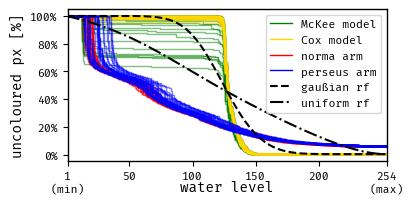

In [21]:
print('plotting...')
plt.figure(figsize=MAIN_FIG(0.5))
for depth in uncoloured_fake_cluster:
  plt.step(WATER_LEVELS, depth, color='g', alpha=0.5)
for depth in uncoloured_fake:
  plt.step(WATER_LEVELS, depth, color='gold', alpha=0.5)
for depth in uncoloured_norm:
  plt.step(WATER_LEVELS, depth, color='r', alpha=0.5)
for depth in uncoloured_perseus:
  plt.step(WATER_LEVELS, depth, color='b', alpha=0.5)

plt.plot([], color='g', label='McKee model')
plt.plot([], color='gold', label='Cox model')
plt.plot([], color='r', label='norma arm')
plt.plot([], color='b', label='perseus arm')

#plot gaussian for reference
gauß_uncol = gauß[:,0]
gauß_uncol = gauß_uncol / np.max(gauß_uncol)
unif_uncol = unif[:,0]
unif_uncol = unif_uncol / np.max(unif_uncol)
plt.plot(gauß_uncol, linestyle='--', color='black', label='gaußian rf', linewidth=1.5)
plt.plot(unif_uncol, linestyle='-.', color='black', label='uniform rf', linewidth=1.5)

plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%','20%','40%','60%','80%','100%'])
plt.xlabel("water level", labelpad=-10)
plt.ylabel("uncoloured px [%]")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/uncoloured_per_slice.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

plotting...


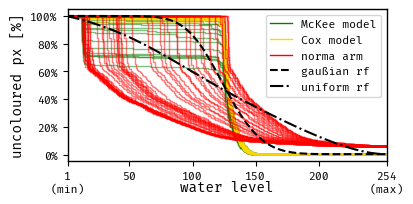

In [22]:
print('plotting...')
plt.figure(figsize=MAIN_FIG(0.5))
for depth in uncoloured_fake_cluster:
  plt.step(WATER_LEVELS, depth, color='g', alpha=0.5)
for depth in uncoloured_fake:
  plt.step(WATER_LEVELS, depth, color='gold', alpha=0.5)
for depth in uncoloured_outer:
  plt.step(WATER_LEVELS, depth, color='r', alpha=0.5)

plt.plot([], color='g', label='McKee model')
plt.plot([], color='gold', label='Cox model')
plt.plot([], color='r', label='norma arm')

#plot gaussian for reference
plt.plot(gauß_uncol, linestyle='--', color='black', label='gaußian rf', linewidth=1.5)
plt.plot(unif_uncol, linestyle='-.', color='black', label='uniform rf', linewidth=1.5)
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%','20%','40%','60%','80%','100%'])

plt.xlabel("water level", labelpad=-10)
plt.ylabel("uncoloured px [%]")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/uncoloured_per_slice_2.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

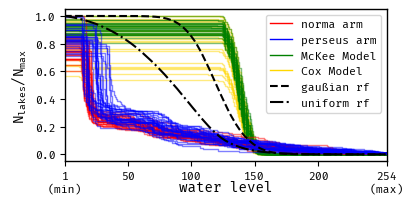

In [23]:
plt.figure(figsize=MAIN_FIG(0.5))

#lake count
for depth in lakes_fake_cluster:
  plt.step(WATER_LEVELS, depth, color='gold', alpha=0.5)
for depth in lakes_fake:
  plt.step(WATER_LEVELS, depth, color='g', alpha=0.5)
for depth in lakes_norm:
  plt.step(WATER_LEVELS, depth, color='r', alpha=0.5)
for depth in lakes_perseus:
  plt.step(WATER_LEVELS, depth, color='b', alpha=0.5)

plt.plot([], color='r', label='norma arm')
plt.plot([], color='b', label='perseus arm')
plt.plot([], color='g', label='McKee Model')
plt.plot([], color='gold', label='Cox Model')

#plot gaussian for reference
gauß_lakes = [len(lakes[np.where(lakes != 0)]) for lakes in gauß]
gauß_lakes = gauß_lakes / np.max(gauß_lakes)
unif_lakes = [len(lakes[np.where(lakes != 0)]) for lakes in unif]
unif_lakes = unif_lakes / np.max(unif_lakes)

plt.plot(gauß_lakes, linestyle='--', color='black', label='gaußian rf', linewidth=1.5)
plt.plot(unif_lakes, linestyle='-.', color='black', label='uniform rf', linewidth=1.5)

plt.xlabel("water level", labelpad=-10)
plt.ylabel("$N_{lakes}/N_{max}$")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/Nlakes_per_slice.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

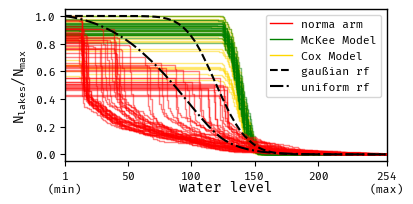

In [24]:
plt.figure(figsize=MAIN_FIG(0.5))

#lake count
for depth in lakes_fake_cluster:
  plt.step(WATER_LEVELS, depth, color='gold', alpha=0.5)
for depth in lakes_fake:
  plt.step(WATER_LEVELS, depth, color='g', alpha=0.5)
for depth in lakes_outer:
  plt.step(WATER_LEVELS, depth, color='r', alpha=0.5)

plt.plot([], color='r', label='norma arm')
plt.plot([], color='g', label='McKee Model')
plt.plot([], color='gold', label='Cox Model')

#plot gaussian for reference
plt.plot(gauß_lakes, linestyle='--', color='black', label='gaußian rf', linewidth=1.5)
plt.plot(unif_lakes, linestyle='-.', color='black', label='uniform rf', linewidth=1.5)

plt.xlabel("water level", labelpad=-10)
plt.ylabel("$N_{lakes}/N_{max}$")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/Nlakes_per_slice_2.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

In [25]:
#same summary statistics, now marginalised
def summary(uncol, lakes):
  uncol = np.average(uncol, 0)
  uncol = uncol / np.max(uncol)
  lakes = np.sum(lakes, 0)
  lakes = lakes / np.max(lakes)
  return (uncol, lakes)

uncoloured_norm, lakes_norm = summary(uncoloured_norm, lakes_norm)
uncoloured_perseus, lakes_perseus = summary(uncoloured_perseus, lakes_perseus)
uncoloured_fake, lakes_fake = summary(uncoloured_fake, lakes_fake)
uncoloured_fake_cluster, lakes_fake_cluster = summary(uncoloured_fake_cluster, lakes_fake_cluster)
uncoloured_outer, lakes_outer = summary(uncoloured_outer, lakes_outer)

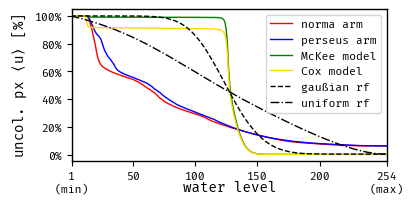

In [26]:
plt.figure(figsize=MAIN_FIG(0.5))

#fill factor again, now marginalised over the whole arm
plt.plot(WATER_LEVELS, uncoloured_norm, color='r', label='norma arm')
plt.plot(WATER_LEVELS, uncoloured_perseus, color='b', label='perseus arm')
plt.plot(WATER_LEVELS, uncoloured_fake, color='g', label='McKee model')
plt.plot(WATER_LEVELS, uncoloured_fake_cluster, color='gold', label='Cox model')

plt.plot(gauß_uncol, linestyle='--', color='black', label='gaußian rf')
plt.plot(unif_uncol, linestyle='-.', color='black', label='uniform rf')

plt.xlabel("water level", labelpad=-10)
plt.ylabel(r"uncol. px $\langle u \rangle$ [%]")
plt.xlim(1, 254)
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%','20%','40%','60%','80%','100%'])
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/uncoloured_average.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

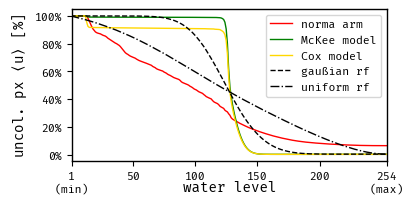

In [27]:
plt.figure(figsize=MAIN_FIG(0.5))

#fill factor again, now marginalised over the whole arm
plt.plot(WATER_LEVELS, uncoloured_outer, color='r', label='norma arm')
plt.plot(WATER_LEVELS, uncoloured_fake, color='g', label='McKee model')
plt.plot(WATER_LEVELS, uncoloured_fake_cluster, color='gold', label='Cox model')

plt.plot(gauß_uncol, linestyle='--', color='black', label='gaußian rf')
plt.plot(unif_uncol, linestyle='-.', color='black', label='uniform rf')

plt.xlabel("water level", labelpad=-10)
plt.ylabel(r"uncol. px $\langle u \rangle$ [%]")
plt.xlim(1, 254)
plt.yticks([0,0.2,0.4,0.6,0.8,1], ['0%','20%','40%','60%','80%','100%'])
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/uncoloured_average_2.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

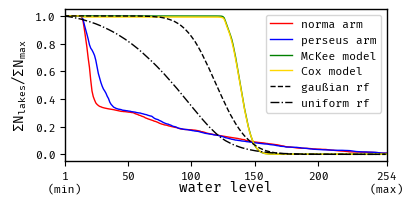

In [28]:
plt.figure(figsize=MAIN_FIG(0.5))

#lake count again, now marginalised over the whole arm
plt.plot(WATER_LEVELS, lakes_norm, color='r', label='norma arm')
plt.plot(WATER_LEVELS, lakes_perseus, color='b', label='perseus arm')
plt.plot(WATER_LEVELS, lakes_fake, color='g', label='McKee model')
plt.plot(WATER_LEVELS, lakes_fake_cluster, color='gold', label='Cox model')

#plot gaussian for reference
plt.plot(gauß_lakes, linestyle='--', color='black', label='gaußian rf')
plt.plot(unif_lakes, linestyle='-.', color='black', label='uniform rf')

plt.xlabel("water level", labelpad=-10)
plt.ylabel(r"$\Sigma N_{lakes}/\Sigma N_{max}$")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/Nlakes_average.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

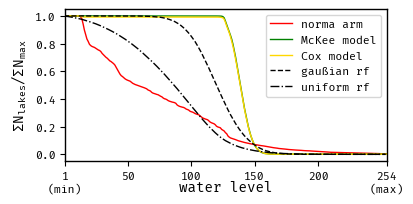

In [29]:
plt.figure(figsize=MAIN_FIG(0.5))

#lake count again, now marginalised over the whole arm
plt.plot(WATER_LEVELS, lakes_outer, color='r', label='norma arm')
plt.plot(WATER_LEVELS, lakes_fake, color='g', label='McKee model')
plt.plot(WATER_LEVELS, lakes_fake_cluster, color='gold', label='Cox model')

#plot gaussian for reference
plt.plot(gauß_lakes, linestyle='--', color='black', label='gaußian rf')
plt.plot(unif_lakes, linestyle='-.', color='black', label='uniform rf')

plt.xlabel("water level", labelpad=-10)
plt.ylabel(r"$\Sigma N_{lakes}/\Sigma N_{max}$")
plt.xlim(1, 254)
plt.xticks(WATER_TICKS, WATER_TICK_LABELS)
plt.legend()
plt.savefig('../figs/Nlakes_average_2.pdf', transparent=True, bbox_inches="tight", pad_inches=0.05)
plt.show()

## Next steps:
- so far we have been working with pixel counts only. This is not what we want, we must take into account that the size of the pixels changes as we look deeper into the galaxy.
- after converting the square pixels to square pc, we turn to histograms

In [30]:
#start with reading the distance data (and slices)
dist = np.genfromtxt(root_path + "sun_distance_channels.csv", delimiter=',')
dist2 = np.genfromtxt(root_path + "sun_distance_channels_2.csv", delimiter=',')

#pixel size
dl = 5e-3 * np.pi / 180
px_size = dist * dl

#relevant slices
norma = np.genfromtxt(root_path + "SLICE_NORMA.csv", delimiter=',', dtype=float)
perseus = np.genfromtxt(root_path + "SLICE_PERSEUS.csv", delimiter=',', dtype=float)
outer = np.genfromtxt(root_path + "SLICE_LOCAL.csv", delimiter=',', dtype=float)

print(f'Perseus arm distance: {round(np.min(dist[np.where(perseus == 1)]), 2)}-{round(np.max(dist[np.where(perseus == 1)]), 2)}')
print(f'Outer arm distance: {round(np.min(dist[np.where(norma == 1)]), 2)}-{round(np.max(dist[np.where(norma == 1)]), 2)}')

#provide pixel sizes (in Pc)
norma_dx = px_size[np.where(norma == 1)]*1000
perseus_dx = px_size[np.where(perseus == 1)]*1000
outer_dx = 1000 * dl * dist2[np.where(outer == 1)]

print(f'Px min/max: {round(np.min(px_size*1000), 3)}/{round(np.max(px_size*1000), 2)}')
print(f'Norma arm min:{round(np.min(norma_dx), 2)}, max:{round(np.max(norma_dx), 2)}')
print(f'Perseus arm min:{round(np.min(perseus_dx), 2)}, max:{round(np.max(perseus_dx), 2)}')

Perseus arm distance: 6.23-8.13
Outer arm distance: 8.9-11.22
Px min/max: 0.0/2.2
Norma arm min:0.78, max:0.98
Perseus arm min:0.54, max:0.71


In [31]:
def px_per_waterlevel(px_sizes, raw):
  per_wlvl = [[] for _  in range(254)]
  sized_lakes = [x * y for x, y in zip(raw, px_sizes)]  
  for all_lakes in sized_lakes:
    for idx, lakes in enumerate(all_lakes):
      if len(lakes) != 0: per_wlvl[idx].append(lakes)
  return [np.concatenate(li) for li in per_wlvl]

#convert pixel-sized lakes to pc-sized lakes
def conv_px_size(px_sizes, lakes):
  return [px_size * lake for (px_size, lake) in zip(px_sizes, lakes)]

def fold(lakes, waterlevel: slice | int):
  return np.concatenate([lake[waterlevel,:].flatten() for lake in lakes])

norma_fold = px_per_waterlevel(norma_dx, lake_size_norm)
perseus_fold = px_per_waterlevel(perseus_dx, lake_size_perseus)
outer_fold = px_per_waterlevel(outer_dx, lake_size_outer)

fake_fold = px_per_waterlevel(perseus_dx, lake_size_fake)
fake_cluster_fold = px_per_waterlevel(perseus_dx, lake_size_fake_cluster)

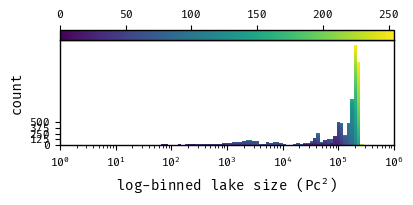

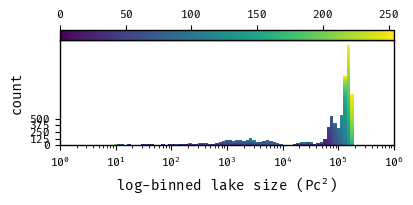

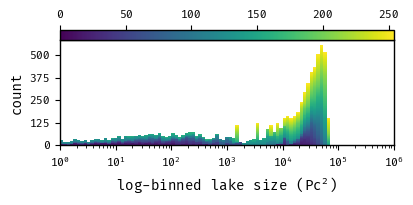

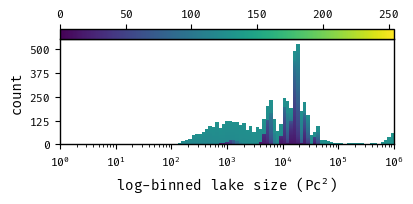

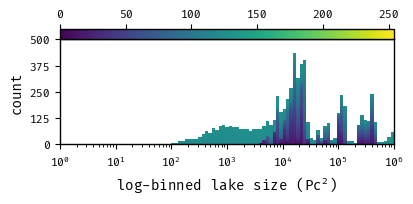

In [32]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib

#make histogram!
NUM_BINS = 100

def make_histogram(real_areas, plot_title):
  bins = np.logspace(0, 6, num=NUM_BINS)
  cmap = matplotlib.cm.get_cmap('viridis')
  cols = np.linspace(0, 1, 254) 
  
  fig, ax = plt.subplots(figsize=MAIN_FIG(0.5))
  ax_divider = make_axes_locatable(ax)  
  ax.hist(real_areas, bins, color=cmap(cols), stacked=True)
  ax.set_xscale("log")
  ax.set_xlabel("log-binned lake size ($Pc^2$)")
  ax.set_ylabel("count")
  ax.set_xlim(np.min(bins), np.max(bins))
  ax.set_yticks([0, 125, 250, 375, 500])
  
  #colorbar
  cax = ax_divider.append_axes('top', size="10%", pad="0%")
  fig.colorbar(
    matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(0, 254)),
    cax=cax,
    orientation='horizontal'
  )
  cax.xaxis.set_ticks_position('top')
  fig.savefig(
    f"../figs/{plot_title.replace(' ', '_')}.pdf",
    transparent=True,
    bbox_inches="tight",
    pad_inches=0.05
  )

#make_histogram(norma_lakes_pc, "histogram of cavities in the norma arm")
make_histogram(norma_fold, "histogram of cavities in the norma arm")
make_histogram(perseus_fold, "histogram of cavities in the perseus arm")
make_histogram(outer_fold, "histogram of cavities in the outer arm (direction-2)")

make_histogram(fake_fold, "histogram of cavities in the fake data cube")
make_histogram(fake_cluster_fold, "histogram of cavities in the fake cluster data cube")